<a href="https://colab.research.google.com/github/Txlu-OG/Learn/blob/main/Assignment_13_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow version: 2.19.0
Dataset loaded: 143956 characters

First 500 characters:

CHAPTER I. Down the Rabbit-Hole
 CHAPTER II. The Pool of Tears
 CHAPTER III. A Caucus-Race and a Long Tale
 CHAPTER IV. The Rabbit Sends in a Little Bill
 CHAPTER V. Advice from a Caterpillar
 CHAPTER VI. Pig and Pepper
 CHAPTER VII. A Mad Tea-Party
 CHAPTER VIII. The Queen’s Croquet-Ground
 CHAPTER IX. The Mock Turtle’s Story
 CHAPTER X. The Lobster Quadrille
 CHAPTER XI. Who Stole the Tarts?
 CHAPTER XII. Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very ti

--- Vocabulary info ---
Vocabulary size: 73
Sample of unique characters: ['\n', ' ', '!', '(', ')', '*', ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ù'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 267s 777ms/step - accuracy: 0.1606 - loss: 3.2945 - val_accuracy: 0.2840 - val_loss: 2.6852
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 259s 767ms/step - accuracy: 0.2820 - loss: 2.6370 - val_accuracy: 0.3368 - val_loss: 2.4213
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 257s 762ms/step - accuracy: 0.3257 - loss: 2.4309 - val_accuracy: 0.3566 - val_loss: 2.2915
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 260s 769ms/step - accuracy: 0.3540 - loss: 2.3106 - val_accuracy: 0.3827 - val_loss: 2.1953
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 257s 762ms/step - accuracy: 0.3775 - loss: 2.2201 - val_accuracy: 0.4027 - val_loss: 2.1232


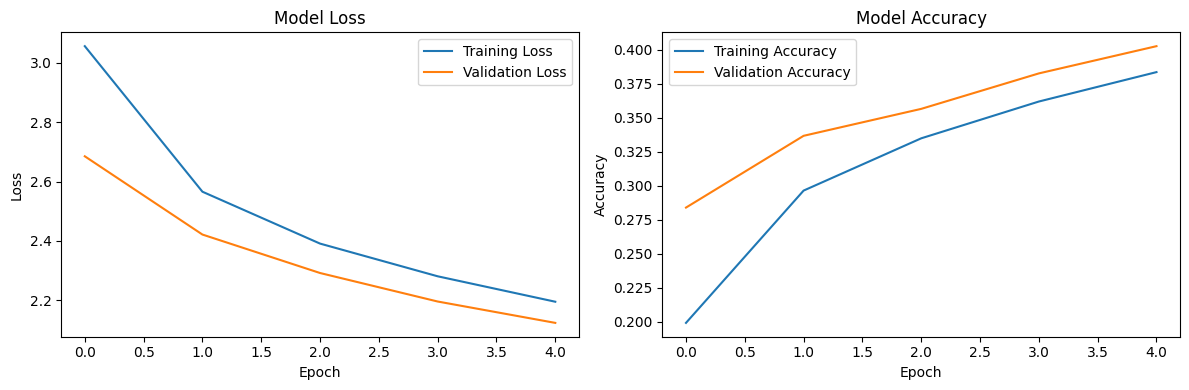

Saved plot to outputs/training_curves.png

Temperature = 0.3 (Conservative):

Alice was beginning to get very curious about the white rabbit.                                                         lut she shat she she care on she wound the war the wourd of the mere wer the be were sous on the san the kas here the was the wice and the wore sar her she sore the war the here the wore the wour the sant a the the here the mat the she mas the and the war the supe the on the wared the she and her th


Temperature = 0.5 (Balanced):

Alice was beginning to get very curious about the white rabbit.                                                         Cot to kere as the cerely she it a bour the lit on the sart on the wad a sant the sous hery on the the the Honger the sous the waid the and at on wing the of a court hers wat wart the so hit the hery, she browed the her the war apiy’s the bus the she und se the bare so so soud then mere be sart the 


Temperature = 0.8 (Creative):

Alice was begi

In [1]:
# Generative AI Essentials
# Character-level LSTM text generation on Project Gutenberg's "Alice in Wonderland"
import os
import re
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibility
SEED = 42
tf.keras.utils.set_random_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

os.makedirs("outputs", exist_ok=True)
print("TensorFlow version:", tf.__version__)

# Dataset: Project Gutenberg (Alice in Wonderland)
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url, timeout=60)
text = response.text

# header/footer strip using Gutenberg markers
head = text.find("*** START OF THE PROJECT GUTENBERG EBOOK")
tail = text.find("*** END OF THE PROJECT GUTENBERG EBOOK")
if head != -1 and tail != -1 and tail > head:
    text = text[head:tail]

# Fallback slicing using chapter markers
if "CHAPTER I" in text and "THE END" in text:
    start = text.find("CHAPTER I")
    end = text.find("THE END")
    if start != -1 and end != -1 and end > start:
        text = text[start:end]

# preprocessing
text = re.sub(r'\r\n?', '\n', text)   # normalize newlines
text = re.sub(r'[ \t]+', ' ', text)   # collapse spaces and tabs
text = text.strip()

# CAP on number of characters
MAX_CHARS = 300_000
if len(text) > MAX_CHARS:
    text = text[:MAX_CHARS]

print(f"Dataset loaded: {len(text)} characters\n")
print("First 500 characters:\n")
print(text[:500])

# Character vocabulary and integer encoding
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}
vocab_size = len(chars)

print("\n--- Vocabulary info ---")
print(f"Vocabulary size: {vocab_size}")
print(f"Sample of unique characters: {chars[:120]}")

# Convert full text to integer indices once
encoded_text = np.array([char_to_idx[ch] for ch in text], dtype=np.int32)

# Sequence building
seq_length = 120          # shorter than 200 to reduce memory
step = 3                  # move window by 3 chars to reduce number of sequences
MAX_SEQUENCES = 80_000    # cap number of training sequences

sequences = []
next_chars = []

for i in range(0, len(encoded_text) - seq_length - 1, step):
    if len(sequences) >= MAX_SEQUENCES:
        break
    seq = encoded_text[i:i + seq_length]
    nxt = encoded_text[i + seq_length]
    sequences.append(seq)
    next_chars.append(nxt)

sequences = np.stack(sequences).astype(np.int32)      # shape: (N, seq_length)
next_chars = np.array(next_chars, dtype=np.int32)     # shape: (N, )

X = sequences
y = next_chars

print(f"\nNumber of training sequences: {X.shape[0]}")
print(f"X shape (integer indices): {X.shape}")
print(f"y shape (integer labels):   {y.shape}")

# Model (Embedding + LSTM)
model = keras.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=64,
        input_length=seq_length
    ),
    layers.LSTM(128, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(128),
    layers.Dropout(0.2),
    layers.Dense(vocab_size, activation='softmax')
])

# sparse_categorical_crossentropy since y is integer labels
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("\n--- Model summary ---")
model.summary()

# Train
history = model.fit(
    X, y,
    batch_size=128,
    epochs=5,          # fewer epochs to keep runtime reasonable
    validation_split=0.1,
    verbose=1
)

# Plot curves

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("outputs/training_curves.png", dpi=150, bbox_inches="tight")
plt.show()
print("Saved plot to outputs/training_curves.png")

# Generation utilities (integer-based)
def generate_text(seed_text, length=300, temperature=0.5):
    """Generate text using the trained model with temperature sampling."""
    # Ensure characters from vocabulary
    filtered_seed = ''.join(ch for ch in seed_text if ch in char_to_idx)
    if not filtered_seed:
        # fallback if all characters were invalid
        filtered_seed = "Alice"

    # Adjust to seq_length by truncating or padding
    seed = filtered_seed[-seq_length:]
    if len(seed) < seq_length:
        seed = seed + " " * (seq_length - len(seed))

    # Convert seed to indices
    seed_indices = [char_to_idx.get(ch, 0) for ch in seed]
    generated = seed

    for _ in range(length):
        x_pred = np.array(seed_indices[-seq_length:], dtype=np.int32)[None, :]  # shape (1, seq_length)

        preds = model.predict(x_pred, verbose=0)[0]  # shape (vocab_size,)
        preds = np.asarray(preds).astype('float64')

        # Temperature scaling
        logits = np.log(preds + 1e-9) / max(temperature, 1e-6)
        probs = np.exp(logits)
        probs = probs / np.sum(probs)

        next_idx = np.random.choice(len(probs), p=probs)
        next_char = idx_to_char[next_idx]

        generated += next_char
        seed_indices.append(next_idx)

    return generated


def create_content_snippet(topic, temperature=0.45, length=400):
    """Generate a short paragraph about a topic in a literary style."""
    prompt = topic.strip()
    if prompt and prompt[0].islower():
        prompt = prompt[0].upper() + prompt[1:]
    prompt = prompt + " "
    return generate_text(prompt, length=length, temperature=temperature)

# Sample generations
seed = "Alice was beginning to get very curious about the white rabbit."

print("\nTemperature = 0.3 (Conservative):\n")
print(generate_text(seed, length=300, temperature=0.3))

print("\n" + "="*80 + "\n")

print("Temperature = 0.5 (Balanced):\n")
print(generate_text(seed, length=300, temperature=0.5))

print("\n" + "="*80 + "\n")

print("Temperature = 0.8 (Creative):\n")
print(generate_text(seed, length=300, temperature=0.8))

print("\n" + "="*80 + "\n")
print("Application demo: 'A bedtime intro for a curious cat' (temperature=0.45)\n")
print(create_content_snippet("A bedtime intro for a curious cat", temperature=0.45, length=450))
